<a href="https://colab.research.google.com/github/Patchppj/Hotel-reservation/blob/main/Model_Senior_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikeras[tensorflow]

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_validate
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier

from scikeras.wrappers import KerasClassifier

from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
#from catboost import CatBoostClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


##Diabetes

###With lab value

In [ ]:
df_dia = pd.read_csv("Data_diabetes.csv")
print(df_dia.head())

   Diabetes  Fatty liver disease  Underlying disease  Fasting plasma glucose  \
0         1                    1                   1                    81.4   
1         1                    1                   1                    87.6   
2         3                    3                   3                    76.8   
3         1                    1                   1                    89.8   
4         1                    1                   1                    76.9   

   HbA1C  Duration of living in this community (years)  Serum creatinine  \
0   5.92                                            23              0.52   
1   5.90                                             2              0.98   
2   4.63                                            24              1.07   
3   4.89                                            24              0.73   
4   5.16                                            23              1.02   

   Plasma Insulin  Education  Total QOL  ...  Pulse  Systolic 

In [ ]:
df_dia.columns

Index(['Diabetes', 'Fatty liver disease', 'Underlying disease',
       'Fasting plasma glucose', 'HbA1C',
       'Duration of living in this community (years)', 'Serum creatinine',
       'Plasma Insulin', 'Education', 'Total QOL', 'Weight',
       'QOL12_Satisfaction with working capacity', 'Pulse', 'Systolic',
       'QOL11_Dependence on medication', 'Vaccination', 'Diastolic',
       'Drinking water per day', 'DASS21 Depression ', 'DASS21 Depression .1',
       'WHOQOL physical health domain ', 'Monthly income'],
      dtype='object')

In [ ]:
# Getting the number of rows and columns in the dataset
df_dia.shape

(867, 22)

In [ ]:
# Getting the statistical measures of the data
df_dia.describe()

,Diabetes,Fatty liver disease,Underlying disease,Fasting plasma glucose,HbA1C,Duration of living in this community (years),Serum creatinine,Plasma Insulin,Education,Total QOL,...,Pulse,Systolic,QOL11_Dependence on medication,Vaccination,Diastolic,Drinking water per day,DASS21 Depression,DASS21 Depression .1,WHOQOL physical health domain,Monthly income
count,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,...,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000
mean,1.303345,1.321799,1.596309,104.181165,5.960745,31.973472,0.879607,10.214662,2.223760,98.355248,...,77.371396,137.928489,3.462514,1.983852,79.838524,3.214533,1.683968,1.683968,26.144175,10871.482122
std,0.627709,0.728200,0.591225,31.129611,2.516102,20.855557,0.737725,17.636991,0.585221,12.826907,...,12.244262,18.711174,1.225938,0.126116,11.924192,0.756875,3.290305,3.290305,3.908447,12908.852398
min,1.000000,1.000000,1.000000,62.500000,3.950000,0.000000,0.490000,0.200000,1.000000,38.000000,...,37.000000,78.000000,1.000000,1.000000,24.000000,1.000000,0.000000,0.000000,13.000000,600.000000
25%,1.000000,1.000000,1.000000,90.000000,5.365000,15.000000,0.720000,5.200000,2.000000,90.000000,...,70.000000,125.000000,3.000000,2.000000,73.000000,3.000000,0.000000,0.000000,24.000000,2500.000000
50%,1.000000,1.000000,2.000000,97.700000,5.700000,28.000000,0.850000,8.600000,2.000000,99.000000,...,76.000000,136.000000,3.000000,2.000000,79.000000,3.000000,0.000000,0.000000,26.000000,7000.000000
75%,1.000000,1.000000,2.000000,104.181165,5.960745,52.000000,0.910000,10.820000,2.000000,106.000000,...,84.000000,150.000000,5.000000,2.000000,87.000000,4.000000,2.000000,2.000000,29.000000,15000.000000
max,3.000000,3.000000,3.000000,398.100000,71.400000,84.000000,20.790000,458.600000,4.000000,129.000000,...,154.000000,210.000000,5.000000,2.000000,134.000000,4.000000,20.000000,20.000000,35.000000,100000.000000


In [ ]:
# Separating the data into features (X) and labels (Y)
X = df_dia.drop(columns='Diabetes', axis=1)
Y = df_dia['Diabetes']

####Train Test Split(with lab value)

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(867, 21) (693, 21) (174, 21)


In [ ]:
# Scale data for models requiring it (SVM, KNN, NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Training Model

####SVM

#####hyperparameters tuning

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

svm_model = SVC()
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, Y_train)
print("Best Parameters: ", grid_search.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
svm_model = SVC( probability=True, random_state=42)

# Training the Support Vector Machine Classifier
svm_model.fit(X_train, Y_train)

SVC(probability=True, random_state=42)

####Model Evaluation

In [ ]:
# Accuracy score on the training data ##Check Overfitting
X_train_prediction_dia = svm_model.predict(X_train)
training_data_accuracy_dia = accuracy_score(X_train_prediction_dia, Y_train)

# Evaluate Test Set
X_test_prediction_dia = svm_model.predict(X_test)
test_data_accuracy_dia = accuracy_score(X_test_prediction_dia, Y_test)
y_pred = svm_model.predict(X_test)

# For ROC-AUC
Y_test_binarized = label_binarize(Y_test, classes=np.unique(Y_test))
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]

print('Accuracy score of the training data: ', training_data_accuracy_dia)
print(f"Accuracy score of the test data: ",test_data_accuracy_dia)

Accuracy score of the training data:  0.7878787878787878
Accuracy score of the test data:  0.7873563218390804


In [ ]:
## Metrics ด้วย average='macro', 'micro', และ 'weighted'
precision_macro = precision_score(Y_test, X_test_prediction_dia, average='macro')
recall_macro = recall_score(Y_test, X_test_prediction_dia, average='macro')
f1_macro = f1_score(Y_test, X_test_prediction_dia, average='macro')

print(f"Precision (macro): {precision_macro:.2f}")
print(f"Recall (macro): {recall_macro:.2f}")
print(f"F1 Score (macro): {f1_macro:.2f}")

Precision (macro): 0.26
Recall (macro): 0.33
F1 Score (macro): 0.29


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


####XGBoost

#####Tuning

In [ ]:
# Shift class labels to start from 0
Y_train -= Y_train.min()
Y_test -= Y_test.min()

In [ ]:
XGB = XGBClassifier()
XGB.fit(X_train, Y_train)
y_pred = XGB.predict(X_test)

print("For Extreme Gradient Boosting model:")
print("Train set accuracy =", XGB.score(X_train, Y_train))
print("Test set accuracy =", XGB.score(X_test, Y_test))

print(classification_report(Y_train, XGB.predict(X_train), digits=3))
print(classification_report(Y_test, y_pred, digits=3))

For Extreme Gradient Boosting model:
Train set accuracy = 1.0
Test set accuracy = 0.8563218390804598
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       546
           1      1.000     1.000     1.000        84
           2      1.000     1.000     1.000        63

    accuracy                          1.000       693
   macro avg      1.000     1.000     1.000       693
weighted avg      1.000     1.000     1.000       693

              precision    recall  f1-score   support

           0      0.890     0.942     0.915       137
           1      0.571     0.381     0.457        21
           2      0.800     0.750     0.774        16

    accuracy                          0.856       174
   macro avg      0.754     0.691     0.715       174
weighted avg      0.843     0.856     0.847       174



####LightGBM

######Tuning

In [ ]:
lgbm = LGBMClassifier(random_state = 12345)
param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

lgb_model = LGBMClassifier()
gs_cv = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
gs_cv.fit(X, Y)
print("Best Parameters: ", gs_cv.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1237
[LightGBM] [Info] Number of data points in the train set: 867, number of used features: 20
[LightGBM] [Info] Start training from score -0.238544
[LightGBM] [Info] Start training from score -2.111079
[LightGBM] [Info] Start training from score -2.395591
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1237
[LightGBM] [Info] Number of data points in the train set: 867, number of used features: 20
[LightGBM] [Info] Start training from score -0.238544
[LightGBM] [Info] Start training from score -2.111079
[LightGBM] [Info] Start training from score -2.395591
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

<ipython-input-17-9786b49354ca>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp, y=feature_imp.index, palette="Blues_d")


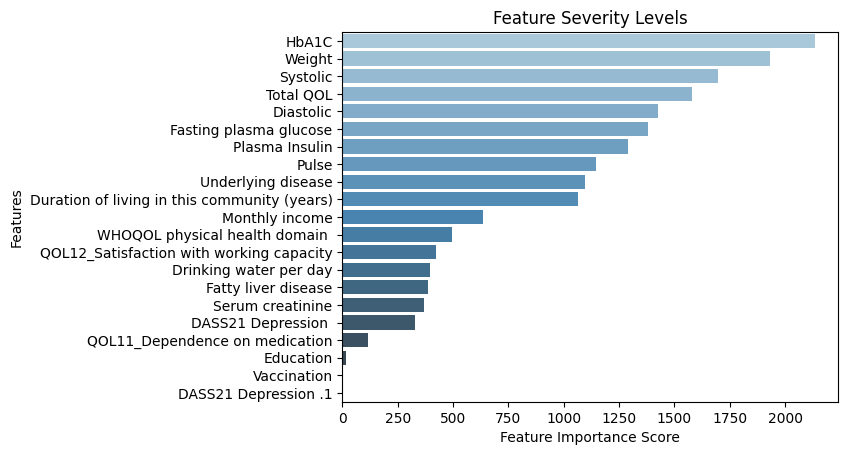

In [ ]:
lgbm_tuned = LGBMClassifier(**gs_cv.best_params_).fit(X, Y)
cross_val_score(lgbm_tuned, X, Y, cv = 10).mean()

feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                       index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index, palette="Blues_d")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Severity Levels")
plt.show()

####LR

In [ ]:
# Model training
log_model = LogisticRegression().fit(X, Y)

# Making predictions
y_pred = log_model.predict(X)

# Evaluating confusion matrix
confusion_matrix(Y, y_pred)

## Printing classification report
print(classification_report(Y, y_pred))

## Calculating ROC AUC
y_prob = log_model.predict_proba(X)  # Shape: (n_samples, n_classes)
roc_auc = roc_auc_score(Y, y_prob, multi_class='ovr')
print("ROC AUC Score (Multiclass):", roc_auc)

# Model Validation: 5-Fold Cross Validation
# You're performing 5-fold cross-validation to assess the performance of the logistic regression model.

##Splitting data into features (X) and target (y)
#y = df_dia["Diabetes"]
#X = df_dia.drop(["Diabetes"], axis=1)

## Fitting logistic regression model
#log_model = LogisticRegression().fit(X, y)

# Cross-validation
cv_results = cross_validate(log_model, X, Y, cv=5, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

# Printing cross-validation results
print(cv_results['test_accuracy'].mean())
print(cv_results['test_f1'].mean())
print(cv_results['test_roc_auc'].mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

              precision    recall  f1-score   support

           1       0.82      0.98      0.89       683
           2       0.67      0.27      0.38       105
           3       0.67      0.05      0.09        79

    accuracy                           0.81       867
   macro avg       0.72      0.43      0.46       867
weighted avg       0.78      0.81      0.76       867

ROC AUC Score (Multiclass): 0.7930306340942638


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * sel

0.8016211547405488
nan
nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2385, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/

####Random Forest

In [ ]:
from sklearn.preprocessing import label_binarize

rf_model = RandomForestClassifier(random_state=46).fit(X_train, Y_train)
y_pred = rf_model.predict(X_test)

# For ROC-AUC
Y_test_binarized = label_binarize(Y_test, classes=np.unique(Y_test))
y_pred_proba = rf_model.predict_proba(X_test)

print(f"Accuracy: {round(accuracy_score(y_pred, Y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred, Y_test, average='macro'), 3)}")
print(f"Precision: {round(precision_score(Y_test, y_pred, average='macro'), 2)}")
print(f"F1: {round(f1_score(Y_test, y_pred, average='macro'), 2)}")
print(f"AUC: {round(roc_auc_score(Y_test_binarized, y_pred_proba, multi_class='ovr'), 2)}")

Accuracy: 0.86
Recall: 0.767
Precision: 0.77
F1: 0.7
AUC: 0.93


####KNN

In [ ]:
# Fitting KNN model
knn_model = KNeighborsClassifier().fit(X, Y)

# Making predictions and calculating ROC AUC
y_pred = knn_model.predict(X)
y_prob = knn_model.predict_proba(X)[:, 1]

y_pred_proba = knn_model.predict_proba(X_test)
Y_test_binarized = label_binarize(Y_test, classes=np.unique(Y_test))

roc_auc = roc_auc_score(Y_test_binarized, y_pred_proba, multi_class='ovr')

## Hyperparameter Optimization
# Defining hyperparameters to search over
knn_params = {"n_neighbors": range(2, 50)}

# Grid search
knn_gs_best = GridSearchCV(knn_model, knn_params, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc').fit(X, Y)

# Best parameters from grid search
knn_gs_best.best_params_

## Final Model
# Setting best hyperparameters
knn_final = knn_model.set_params(**knn_gs_best.best_params_).fit(X, Y)

# Cross-validation for final KNN model
cv_results_final = cross_validate(knn_final, X, Y, cv=5, scoring=["accuracy", "precision_weighted", "recall_weighted", "f1_weighted", "roc_auc_ovr"])

# Printing cross-validation results
print("Mean Accuracy:", cv_results_final['test_accuracy'].mean())
print("Mean Precision:", cv_results_final['test_precision_weighted'].mean())
print("Mean Recall:", cv_results_final['test_recall_weighted'].mean())
print("Mean F1-Weighted:", cv_results_final['test_f1_weighted'].mean())
print("Mean ROC AUC:", cv_results_final['test_roc_auc_ovr'].mean())

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Mean Accuracy: 0.7866121852368614
Mean Precision: 0.7125916788389872
Mean Recall: 0.7866121852368614
Mean F1-Weighted: 0.7298082915378739
Mean ROC AUC: 0.6051081694896511


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###Neural Network

In [ ]:
create_nn = Sequential()

create_nn.add(Dense(64, activation='relu', input_shape=(X.shape[1],))),
create_nn.add(Dense(32, activation="relu", input_shape=(8,)))
create_nn.add(Dense(1, activation="sigmoid"))

create_nn.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy", "Precision", "Recall", "AUC","f1"]
)

create_nn.fit(X, Y, epochs=10, batch_size=64, verbose=1)

# Evaluate the baseline model
loss, accuracy, precision, recall, auc = create_nn.evaluate(X, Y, verbose=0)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC: {auc}")
print(f"F1: {f1_weighted}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - AUC: 0.0000e+00 - Precision: 0.4667 - Recall: 0.1395 - accuracy: 0.1097 - loss: 1375.2566            
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.0000e+00 - Precision: 1.0000 - Recall: 1.0000 - accuracy: 0.7955 - loss: -566.5764  
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.0000e+00 - Precision: 1.0000 - Recall: 1.0000 - accuracy: 0.7925 - loss: -1325.5092
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.0000e+00 - Precision: 1.0000 - Recall: 1.0000 - accuracy: 0.7906 - loss: -2045.0618 
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.0000e+00 - Precision: 1.0000 - Recall: 1.0000 - accuracy: 0.7740 - loss: -2991.4338 
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.0000e+00 - Precision: 1.0000 - Recall: 1.0000 - accuracy: 0.7755 - loss: -4567.6055 
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.0000e+00 - Precision: 1.0000 - Recall: 1.0000 - accuracy: 0.7804 - loss: -6338

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.805052 (0.018431)
KNN: 0.780901 (0.024788)


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

NN: 0.787784 (0.005127)
RF: 0.895122 (0.027789)
SVM: 0.787784 (0.005127)
XGB: 0.888185 (0.030301)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1183
[LightGBM] [Info] Number of data points in the train set: 780, number of used features: 20
[LightGBM] [Info] Start training from score -0.239299
[LightGBM] [Info] Start training from score -2.105417
[LightGBM] [Info] Start training from score -2.396614
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

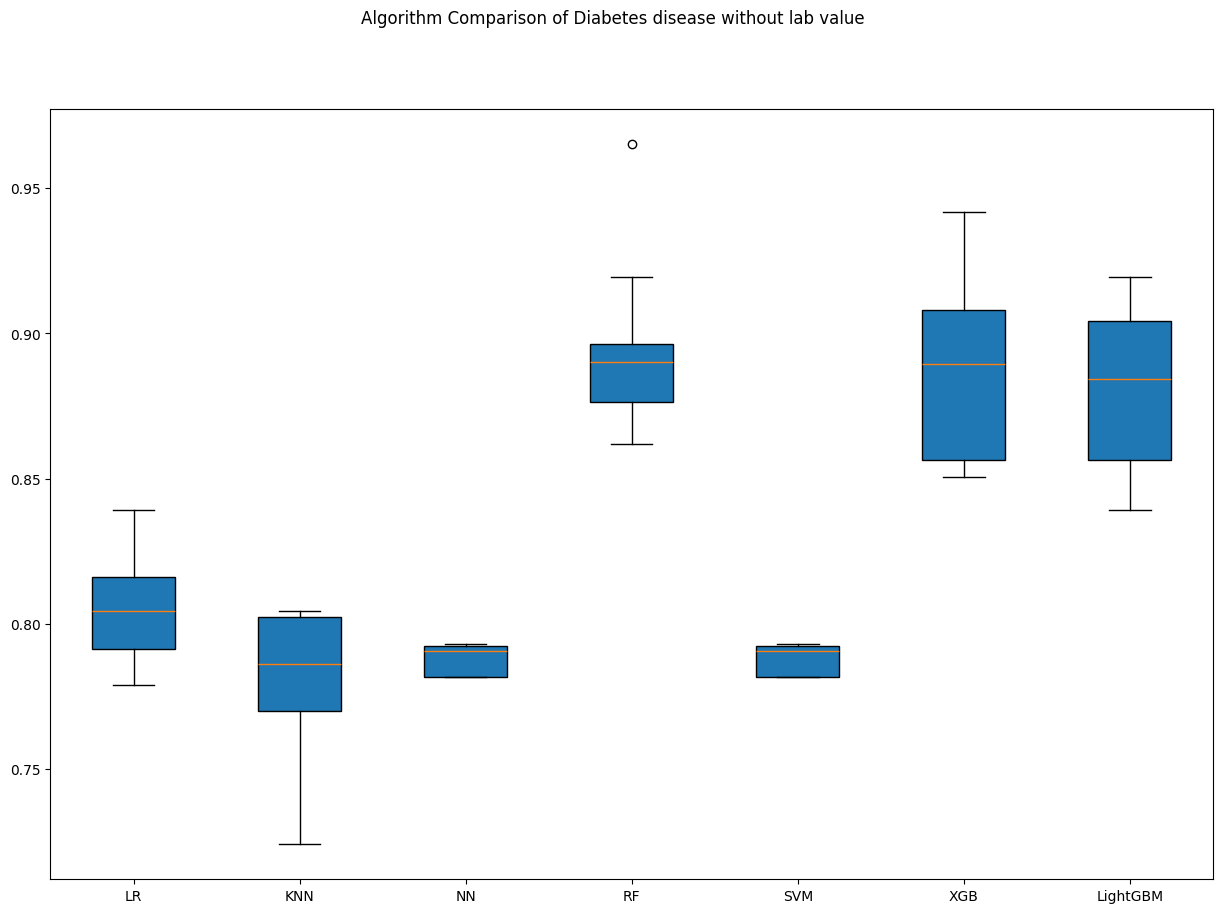

In [ ]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NN', KerasClassifier(build_fn=create_nn, epochs=10, batch_size=32, verbose=0)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

#evaluate each model in turn
results = []
names = []

for name, model in models:

        cv_results = cross_val_score(model, X, Y, cv = 10, scoring= "accuracy", error_score='raise')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

#boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison of Diabetes disease without lab value')
ax = fig.add_subplot(111)
plt.boxplot(results,
            vert=True, #vertical box alignment
            patch_artist=True) #fill with color

ax.set_xticklabels(names)
plt.show()

#Without lab value

In [ ]:
df_dia_nolab = pd.read_csv("Data_diabetes_nolab.csv")
df_dia_nolab.head()

,Diabetes,Fatty liver disease,Underlying disease,Systolic,Duration of living in this community (years),Height,Waistline,Diastolic,QOL12_Satisfaction with working capacity,WHOQOL environment domain,...,Total QOL,QOL13_Having good personal relationships,Other diseases,WHOQOL social relationships domain,DASS21 Stress,"Consumption of tea, coffee (glass)",Frequency of defecation,Eating regular vitamins/supplements,DASS10_I felt that I had 1thing to look forward to,เบาหวาน
0,1,1,1,134,23,155,81,84,4,28,...,103,5,1,13,4,2,3,2,0,5
1,1,1,1,106,2,162,50,71,4,28,...,100,4,1,12,1,1,3,2,0,0
2,3,3,3,118,24,168,75,65,4,29,...,95,4,3,12,2,1,2,2,3,2
3,1,1,1,120,24,169,51,88,5,30,...,109,5,1,14,1,1,1,2,0,0
4,1,1,1,113,23,175,84,65,4,28,...,103,4,1,13,1,1,3,1,0,2


In [ ]:
df_dia_nolab.describe()

,Diabetes,Fatty liver disease,Underlying disease,Systolic,Duration of living in this community (years),Height,Waistline,Diastolic,QOL12_Satisfaction with working capacity,WHOQOL environment domain,...,Total QOL,QOL13_Having good personal relationships,Other diseases,WHOQOL social relationships domain,DASS21 Stress,"Consumption of tea, coffee (glass)",Frequency of defecation,Eating regular vitamins/supplements,DASS10_I felt that I had 1thing to look forward to,เบาหวาน
count,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,...,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000
mean,1.303345,1.321799,1.596309,137.928489,31.973472,158.621684,77.971165,79.838524,3.805075,29.635525,...,98.355248,4.043829,2.206459,11.152249,2.534025,1.472895,2.776240,1.344867,0.264129,6.352941
std,0.627709,0.728200,0.591225,18.711174,20.855557,7.795444,13.340464,11.924192,0.835180,4.542184,...,12.826907,0.714688,1.369430,1.935419,3.654183,0.499553,0.617855,0.475599,0.650559,3.454421
min,1.000000,1.000000,1.000000,78.000000,0.000000,110.000000,40.000000,24.000000,1.000000,8.000000,...,38.000000,1.000000,0.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,125.000000,15.000000,153.000000,71.000000,73.000000,3.000000,27.000000,...,90.000000,4.000000,1.000000,10.000000,0.000000,1.000000,3.000000,1.000000,0.000000,4.000000
50%,1.000000,1.000000,2.000000,136.000000,28.000000,158.000000,79.000000,79.000000,4.000000,30.000000,...,99.000000,4.000000,2.000000,11.000000,1.000000,1.000000,3.000000,1.000000,0.000000,7.000000
75%,1.000000,1.000000,2.000000,150.000000,52.000000,164.000000,87.000000,87.000000,4.000000,32.000000,...,106.000000,5.000000,3.000000,12.000000,4.000000,2.000000,3.000000,2.000000,0.000000,9.000000
max,3.000000,3.000000,3.000000,210.000000,84.000000,187.000000,140.000000,134.000000,5.000000,40.000000,...,129.000000,5.000000,6.000000,15.000000,21.000000,2.000000,3.000000,2.000000,3.000000,17.000000


In [ ]:
df_dia_nolab.shape

(867, 40)

In [ ]:
classifier = svm.SVC(kernel='linear')

X_dia_nolab = df_dia_nolab.drop(columns='Diabetes', axis=1)
Y_dia_nolab = df_dia_nolab['Diabetes']

In [ ]:
scaler = StandardScaler()
# Fitting the scaler to our feature data (X)
scaler.fit(X_dia_nolab)

StandardScaler()

In [ ]:
# Transforming the feature data using the scaler
standardized_data = scaler.transform(X_dia_nolab)

X = standardized_data
Y = df_dia['Diabetes']

# Printing the standardized features and labels
print(X)
print(Y)

[[-0.44216586 -1.00918064 -0.21007535 ...  1.37828355 -0.40623787
  -0.39188102]
 [-0.44216586 -1.00918064 -1.7073711  ...  1.37828355 -0.40623787
  -1.84013698]
 [ 2.30591873  2.37557608 -1.06567292 ...  1.37828355  4.20784375
  -1.2608346 ]
 ...
 [ 2.30591873  0.68319772  0.53857252 ... -0.72554011 -0.40623787
   1.34602613]
 [-0.44216586  0.68319772 -0.58439929 ...  1.37828355 -0.40623787
   0.18742136]
 [-0.44216586 -1.00918064 -0.10312566 ... -0.72554011 -0.40623787
  -0.10222983]]
0      1
1      1
2      3
3      1
4      1
      ..
862    1
863    1
864    1
865    1
866    1
Name: Diabetes, Length: 867, dtype: int64


##Train Test Split(without lab value)

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(867, 39) (606, 39) (261, 39)


##Training Model

####SVM

In [ ]:
model_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(39,), activation='relu'),  # Adjusted for 39 input features
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(21)  # Assuming 21 is the output size you want
])
model_nn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Or another loss depending on your task
    metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


LR: 0.820102 (0.024537)
KNN: 0.821264 (0.018338)


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = sel

NN: 0.791272 (0.016942)
RF: 0.839749 (0.016813)
SVM: 0.839722 (0.019881)
XGB: 0.836234 (0.020320)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 780, number of used features: 39
[LightGBM] [Info] Start training from score -0.239299
[LightGBM] [Info] Start training from score -2.105417
[LightGBM] [Info] Start training from score -2.396614
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

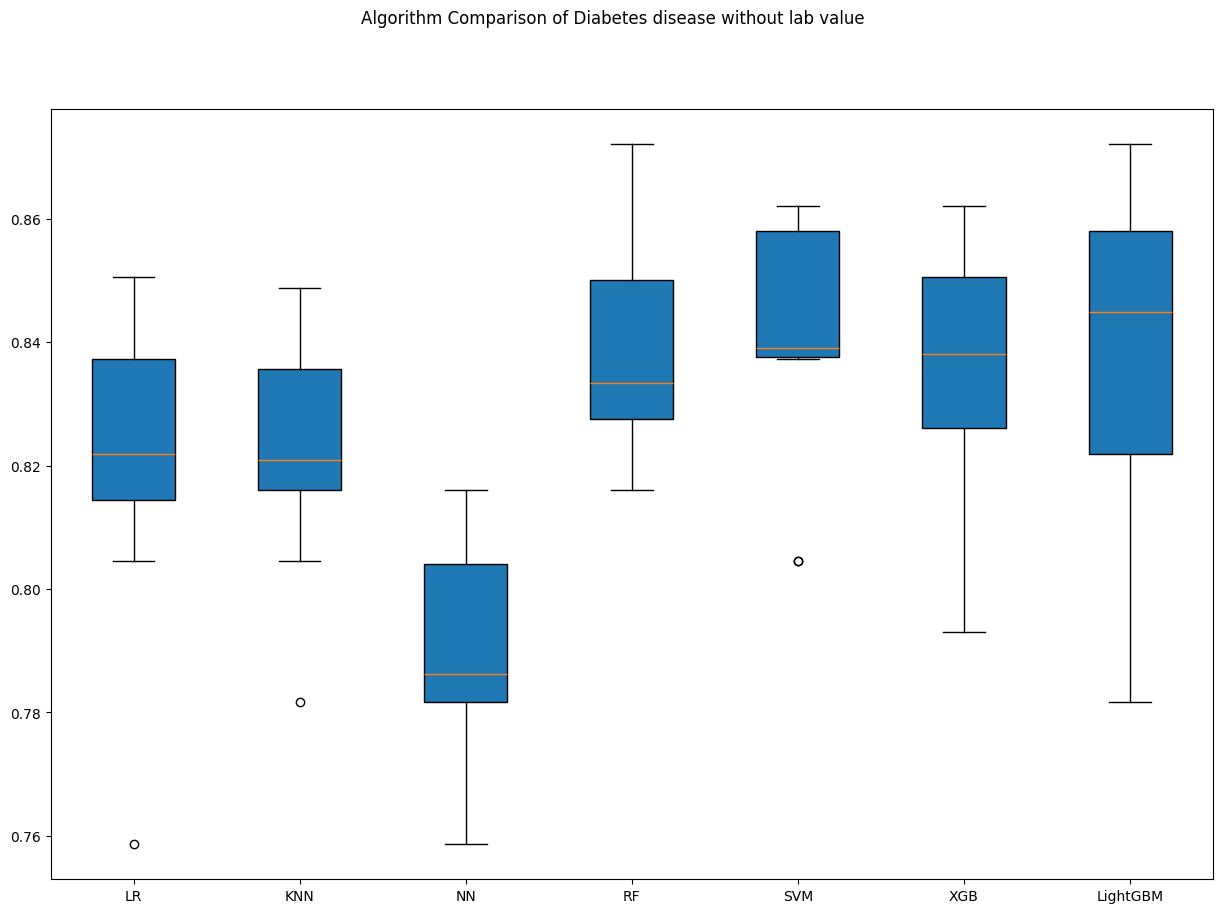

In [ ]:
model_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(39,), activation='relu'),  # Adjusted for 39 input features
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(21)  # Assuming 21 is the output size you want
])
model_nn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Or another loss depending on your task
    metrics=['accuracy'])

models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NN', KerasClassifier(build_fn=model_nn, epochs=10, batch_size=32, verbose=0)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

#evaluate each model in turn
results = []
names = []

for name, model in models:

        cv_results = cross_val_score(model, X, Y, cv = 10, scoring= "accuracy", error_score='raise')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

#boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison of Diabetes disease without lab value')
ax = fig.add_subplot(111)
plt.boxplot(results,
            vert=True, #vertical box alignment
            patch_artist=True) #fill with color

ax.set_xticklabels(names)
plt.show()

##Hypertension

###With lab value

In [ ]:
df_hyp = pd.read_csv("Data_hypertention.csv")
df_hyp.head()

,Hypertention,Underlying disease,Cancer,เบาหวาน,Plasma Insulin,Serum creatinine,LDL-cholesterol,WHOQOL environment domain,Systolic,Diastolic,Fasting plasma glucose,Pulse
0,1,1,1,5,20.38,0.52,77.1,28,134,84,81.4,87
1,1,1,1,0,15.44,0.98,170.0,28,106,71,87.6,84
2,3,3,3,2,4.25,1.07,161.2,29,118,65,76.8,66
3,1,1,1,0,3.23,0.73,117.8,30,120,88,89.8,88
4,1,1,1,2,4.05,1.02,116.0,28,113,65,76.9,68


In [ ]:
classifier = svm.SVC(kernel='linear')

X_hyp = df_hyp.drop(columns='Hypertention', axis=1)
Y_hyp = df_hyp['Hypertention']

scaler = StandardScaler()
# Fitting the scaler to our feature data (X)
scaler.fit(X_hyp)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X_hyp)

X = standardized_data
Y = df_hyp['Hypertention']

####Train Test Split

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(867, 11) (606, 11) (261, 11)


LR: 0.838519 (0.054097)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KNN: 0.784376 (0.051024)


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', becaus

NN: 0.625154 (0.004703)
RF: 0.847795 (0.051909)
SVM: 0.836220 (0.054821)
XGB: 0.847728 (0.045800)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 959
[LightGBM] [Info] Number of data points in the train set: 780, number of used features: 11
[LightGBM] [Info] Start training from score -0.471030
[LightGBM] [Info] Start training from score -1.288656
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

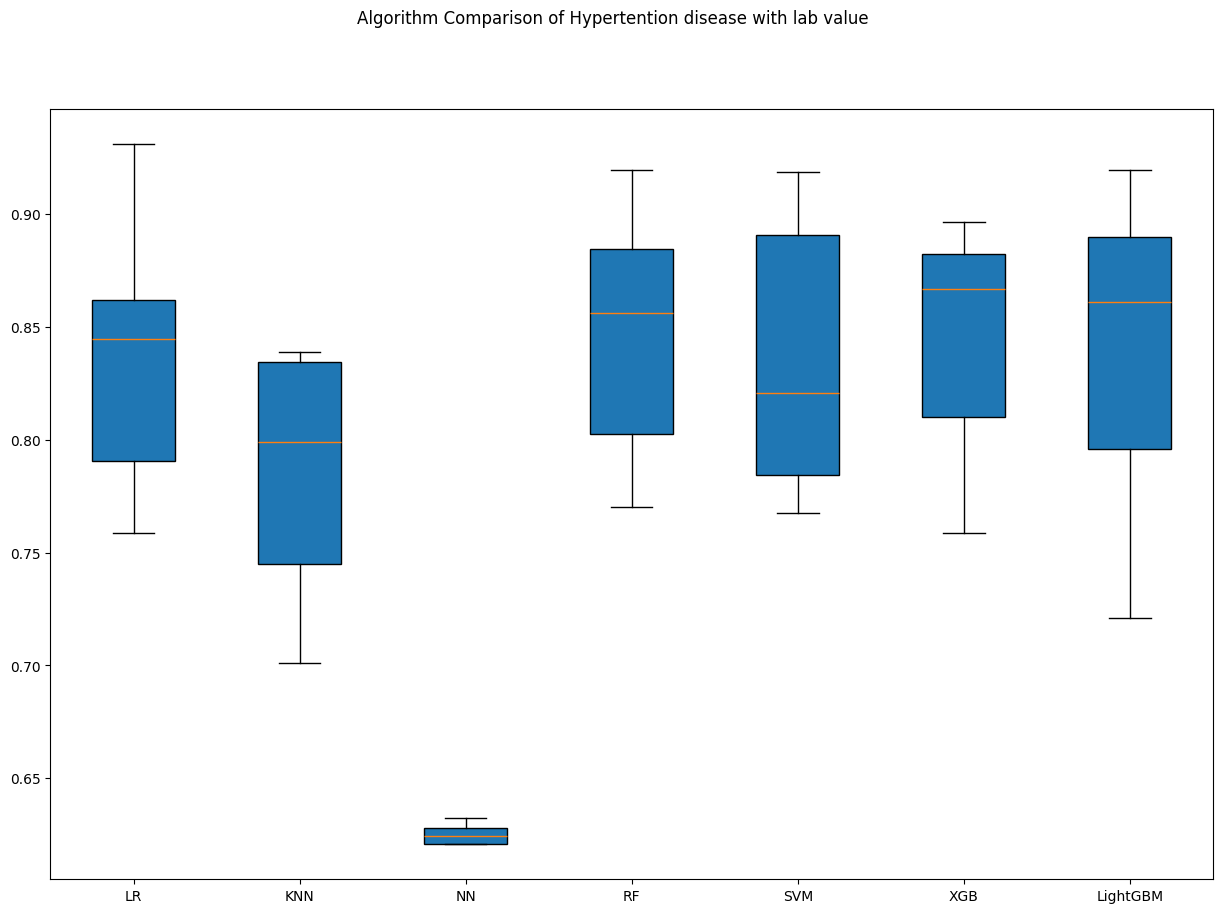

In [ ]:
nn =  Sequential()
nn.add(Dense(64, activation='relu', input_shape=(11,))),
nn.add(Dense(32, activation="relu", input_shape=(8,)))
nn.add(Dense(1, activation="sigmoid"))

nn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Or another loss depending on your task
    metrics=['accuracy'])


models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NN', KerasClassifier(build_fn=nn, epochs=10, batch_size=32, verbose=0)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

#evaluate each model in turn
results = []
names = []

for name, model in models:

        cv_results = cross_val_score(model, X, Y, cv = 10, scoring= "accuracy", error_score='raise')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

#boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison of Hypertention disease with lab value')
ax = fig.add_subplot(111)
plt.boxplot(results,
            vert=True, #vertical box alignment
            patch_artist=True) #fill with color

ax.set_xticklabels(names)
plt.show()

####Without lab value

In [ ]:
df_hyp_nolab = pd.read_csv("Data_hypertention_nolab.csv")
df_hyp_nolab.head()

,Hypertention,Underlying disease,Cancer,เบาหวาน,Waistline,Systolic,Other diseases,Pulse,WHOQOL environment domain,Weight,...,QOL9_Having negative feelings,Monthly income,PHQ5_Poor appetite or overeating,Age,Drinking alcohol,Duration of living in this community (years),Frequency of defecation,QOL22_Satisfaction with transportation,QOL23_Having good spirituality,Duration of exercise
0,1,1,1,5,81,134,1,87,28,66,...,4,16000,1,36,1,23,3,3,5,2
1,1,1,1,0,50,106,1,84,28,52,...,5,20000,2,36,2,2,3,3,4,2
2,3,3,3,2,75,118,3,66,29,46,...,3,13000,1,30,1,24,2,3,4,1
3,1,1,1,0,51,120,1,88,30,57,...,4,16000,1,25,1,24,1,3,5,3
4,1,1,1,2,84,113,1,68,28,66,...,3,5000,0,23,2,23,3,4,5,1


In [ ]:
classifier = svm.SVC(kernel='linear')

X_hyp_nolab = df_hyp_nolab.drop(columns='Hypertention', axis=1)
Y_hyp_nolab = df_hyp_nolab['Hypertention']

scaler = StandardScaler()
# Fitting the scaler to our feature data (X)
scaler.fit(X_hyp_nolab)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X_hyp_nolab)

X = standardized_data
Y = df_hyp_nolab['Hypertention']

####Train Test Spit

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(867, 27) (606, 27) (261, 27)


####Model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


LR: 0.839628 (0.045463)
KNN: 0.787757 (0.042840)


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', becaus

NN: 0.625154 (0.004703)
RF: 0.855867 (0.037407)
SVM: 0.820061 (0.032293)
XGB: 0.860438 (0.040646)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 898
[LightGBM] [Info] Number of data points in the train set: 780, number of used features: 27
[LightGBM] [Info] Start training from score -0.471030
[LightGBM] [Info] Start training from score -1.288656
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

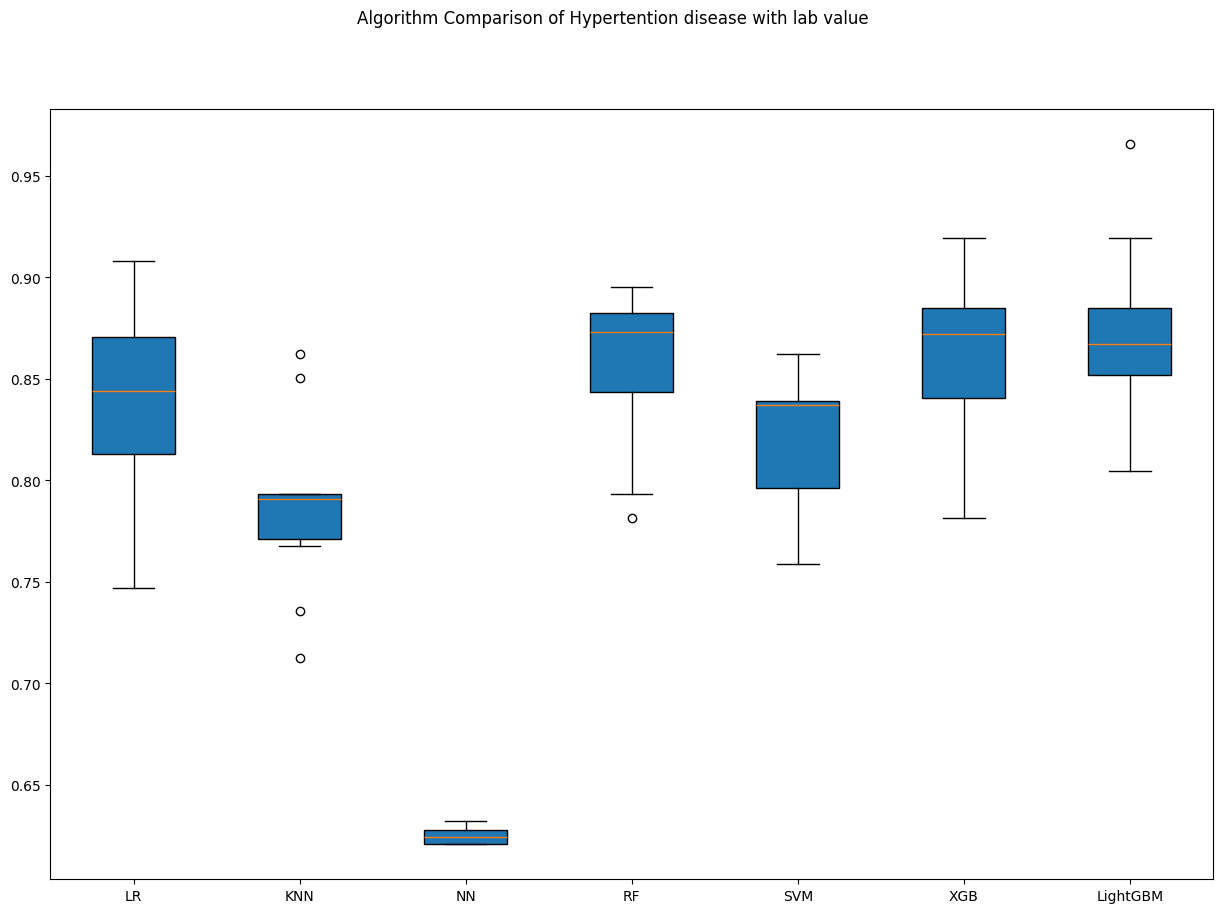

In [ ]:
nn_hyp_nolab =  Sequential()
nn_hyp_nolab.add(Dense(64, activation='relu', input_shape=(27,))),
nn_hyp_nolab.add(Dense(32, activation="relu", input_shape=(8,)))
nn_hyp_nolab.add(Dense(1, activation="sigmoid"))

nn_hyp_nolab.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Or another loss depending on your task
    metrics=['accuracy'])


models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NN', KerasClassifier(build_fn=nn_hyp_nolab, epochs=10, batch_size=32, verbose=0)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

#evaluate each model in turn
results = []
names = []

for name, model in models:

        cv_results = cross_val_score(model, X, Y, cv = 10, scoring= "accuracy", error_score='raise')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

#boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison of Hypertention disease with lab value')
ax = fig.add_subplot(111)
plt.boxplot(results,
            vert=True, #vertical box alignment
            patch_artist=True) #fill with color

ax.set_xticklabels(names)
plt.show()

##Dyslipidemia Disease

####With lab data

In [ ]:
df_dys = pd.read_csv("Data_dyslipidemia.csv")
df_dys.head()

,Dyslipidemia,Fatty liver disease,Underlying disease,Type of house,Age,Weight,BMI,Urine microalbumin,Monthly income,Duration of living in this community (years),...,Serum cortisol,Plasma Insulin,Stool type,Total cholesterol,Triglyceride,QOL3_Having good physical functionality,Waistline,DASS10_I felt that I had 1thing to look forward to,Cancer,WHOQOL environment domain
0,1,1,1,3,36,66,27.47,4.2,16000,23,...,21.31,20.38,1,179.5,247.0,4,81,0,1,28
1,1,1,1,3,36,52,19.81,34.8,20000,2,...,6.23,15.44,1,243.5,109.0,5,50,0,1,28
2,3,3,3,3,30,46,16.30,3.0,13000,24,...,8.34,4.25,4,253.4,69.0,5,75,3,3,29
3,1,1,1,3,25,57,19.96,3.0,16000,24,...,19.63,3.23,1,204.4,45.0,5,51,0,1,30
4,1,1,1,3,23,66,21.55,5.3,5000,23,...,18.14,4.05,1,196.6,78.0,4,84,0,1,28


In [ ]:
classifier = svm.SVC(kernel='linear')

X_dys = df_dys.drop(columns='Dyslipidemia', axis=1)
Y_dys = df_dys['Dyslipidemia']

scaler = StandardScaler()
# Fitting the scaler to our feature data (X)
scaler.fit(X_dys)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X_dys)

X = standardized_data
Y = df_dys['Dyslipidemia']

####Train Test Split

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(867, 45) (606, 45) (261, 45)


In [ ]:
nn_dys =  Sequential()
nn_dys.add(Dense(64, activation='relu', input_shape=(45,))),
nn_dys.add(Dense(32, activation="relu", input_shape=(8,)))
nn_dys.add(Dense(1, activation="sigmoid"))

nn_dys.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Or another loss depending on your task
    metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


LR: 0.814248 (0.040601)
KNN: 0.803929 (0.039114)


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', becaus

NN: 0.696659 (0.004805)
RF: 0.836167 (0.029302)
SVM: 0.814288 (0.020352)
XGB: 0.825755 (0.040358)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2538
[LightGBM] [Info] Number of data points in the train set: 780, number of used features: 45
[LightGBM] [Info] Start training from score -0.362185
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.986465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

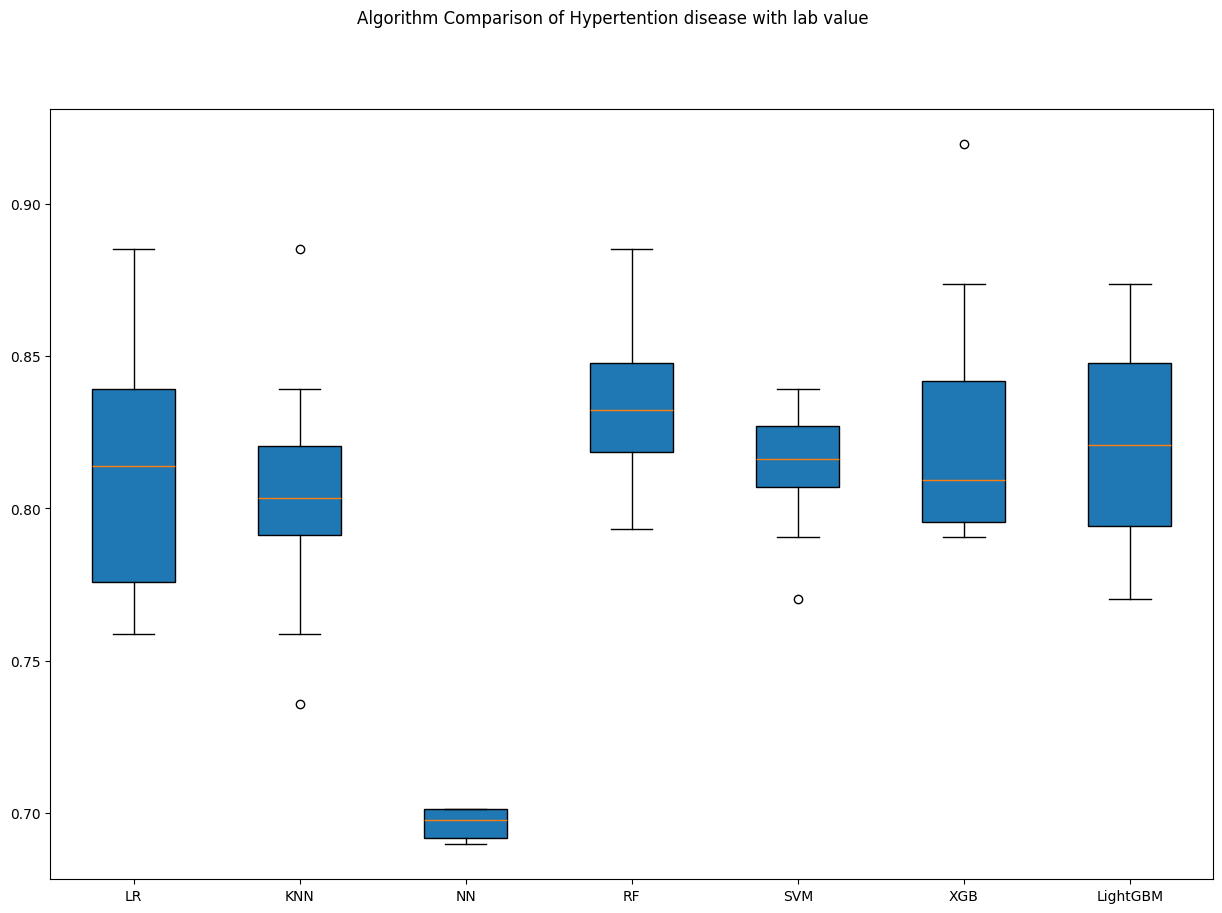

In [ ]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NN', KerasClassifier(build_fn=nn_dys, epochs=10, batch_size=32, verbose=0)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

#evaluate each model in turn
results = []
names = []

for name, model in models:

        cv_results = cross_val_score(model, X, Y, cv = 10, scoring= "accuracy", error_score='raise')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

#boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison of Hypertention disease with lab value')
ax = fig.add_subplot(111)
plt.boxplot(results,
            vert=True, #vertical box alignment
            patch_artist=True) #fill with color

ax.set_xticklabels(names)
plt.show()

###Without lab value

In [ ]:
df_dys_nolab = pd.read_csv("Data_dyslipidemia_nolab.csv")
df_dys_nolab.head()

,Dyslipidemia,Fatty liver disease,Underlying disease,Type of house,BMI,Age,Duration of a long time sitting (hours),Waistline,QOL25_Satisfaction with sex,Monthly income,...,"PHQ2_Feeling down, depressed or hopeless",QOL19_Satisfaction with information,Height,DASS6_I tended to over-react to situations,Total_PHQ9,QOL20_Having leisure time,QOL14_Having good social support,QOL3_Having good physical functionality,DASS21 Depression,DASS14_I was intolerant of anything that kept me from getting on with what I was doing
0,1,1,1,3,27.47,36,5,81,4,16000,...,0,4,155,1,2,4,4,4,0,1
1,1,1,1,3,19.81,36,6,50,4,20000,...,0,4,162,0,7,2,4,5,0,0
2,3,3,3,3,16.30,30,6,75,4,13000,...,1,4,168,0,16,4,4,5,11,2
3,1,1,1,3,19.96,25,8,51,4,16000,...,0,4,169,0,2,4,5,5,1,0
4,1,1,1,3,21.55,23,8,84,5,5000,...,0,3,175,1,1,4,4,4,1,0


In [ ]:
classifier = svm.SVC(kernel='linear')

X_dys_nolab = df_dys_nolab.drop(columns='Dyslipidemia', axis=1)
Y_dys_nolab = df_dys_nolab['Dyslipidemia']

scaler = StandardScaler()
# Fitting the scaler to our feature data (X)
scaler.fit(X_dys_nolab)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X_dys_nolab)

X = standardized_data
Y = df_dys_nolab['Dyslipidemia']

####Train Test Split

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(867, 42) (606, 42) (261, 42)


#####Neural network

In [ ]:
nn_dys_nolab =  Sequential()
nn_dys_nolab.add(Dense(64, activation='relu', input_shape=(42,))),
nn_dys_nolab.add(Dense(32, activation="relu", input_shape=(8,)))
nn_dys_nolab.add(Dense(10, activation='softmax'))

nn_dys_nolab.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Or another loss depending on your task
    metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#####Compair accurancy of 7 models in Dyslipidemia disease

LR: 0.816573 (0.051144)
KNN: 0.783133 (0.037867)


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = sel

NN: 0.823550 (0.038113)
RF: 0.839602 (0.031471)
SVM: 0.818925 (0.015371)
XGB: 0.816653 (0.033670)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 876
[LightGBM] [Info] Number of data points in the train set: 780, number of used features: 42
[LightGBM] [Info] Start training from score -0.362185
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.986465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

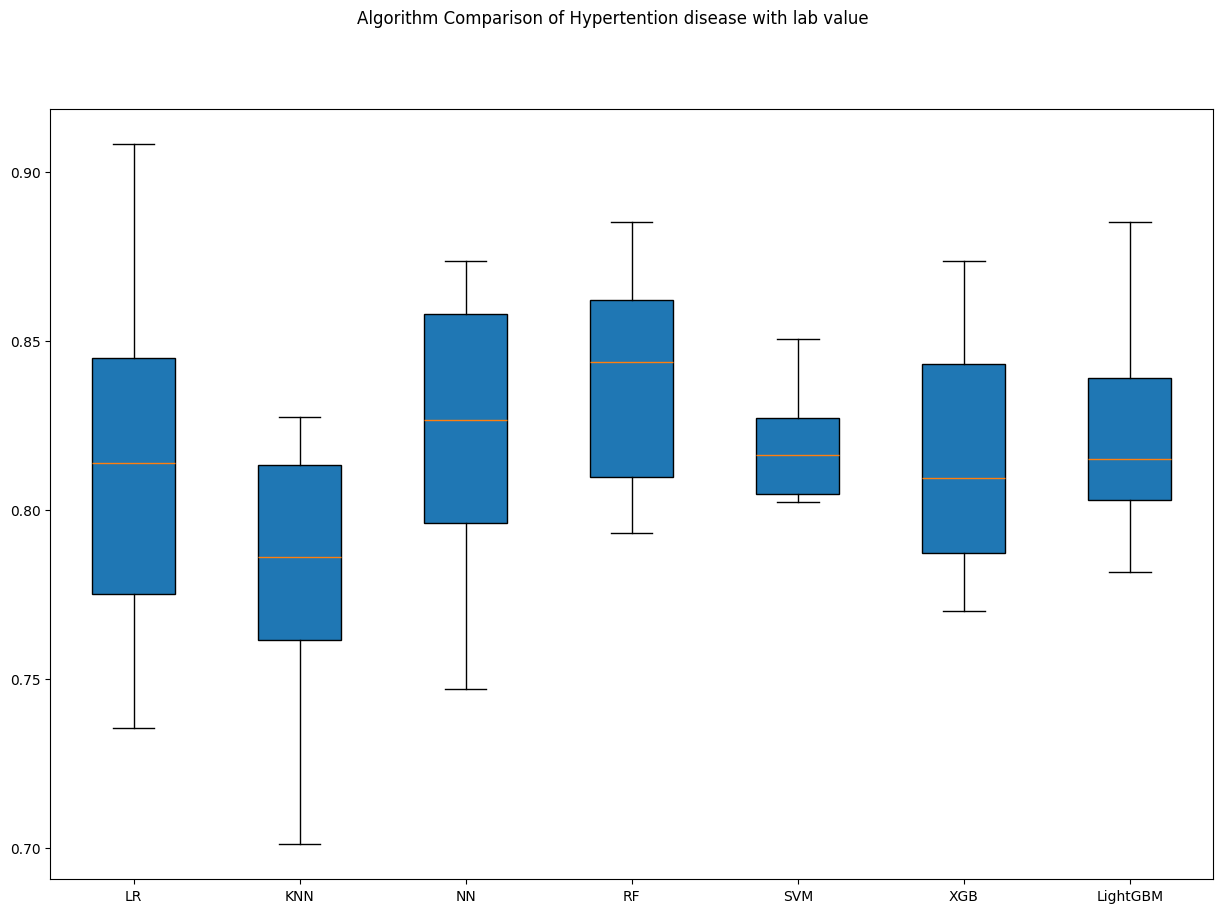

In [ ]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NN', KerasClassifier(build_fn = nn_dys_nolab, epochs=10, batch_size=32, verbose=0)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

#evaluate each model in turn
results = []
names = []

for name, model in models:

        cv_results = cross_val_score(model, X, Y, cv = 10, scoring= "accuracy", error_score='raise')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

#boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison of Hypertention disease with lab value')
ax = fig.add_subplot(111)
plt.boxplot(results,
            vert=True, #vertical box alignment
            patch_artist=True) #fill with color

ax.set_xticklabels(names)
plt.show()

###SVM

In [ ]:
# Training the Support Vector Machine Classifier
classifier.fit(X_train_dia_nolab, Y_train_dia_nolab)

####Model Evaluation

In [ ]:
# Accuracy score on the training data ##Check Overfitting
X_train_prediction_dia_nolab = classifier.predict(X_train_dia_nolab)
training_data_accuracy_dia_nolab = accuracy_score(X_train_prediction_dia_nolab, Y_train_dia_nolab)

# Evaluate Test Set
X_test_prediction_dia_nolab = classifier.predict(X_test_dia_nolab)
test_data_accuracy_dia_nolab = accuracy_score(X_test_prediction_dia, Y_test_dia_nolab)

print('Accuracy score of the training data: ', training_data_accuracy_dia_nolab)
print(f"Accuracy score of the test data: ",test_data_accuracy_dia_nolab)

In [ ]:
## Metrics ด้วย average='macro', 'micro', และ 'weighted'
precision_macro = precision_score(Y_test_dia_nolab, X_test_prediction_dia_nolab, average='macro')
recall_macro = recall_score(Y_test_dia_nolab, X_test_prediction_dia_nolab, average='macro')
f1_macro = f1_score(Y_test_dia_nolab, X_test_prediction_dia_nolab, average='macro')

print(f"Precision (macro): {precision_macro:.2f}")
print(f"Recall (macro): {recall_macro:.2f}")
print(f"F1 Score (macro): {f1_macro:.2f}")